In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Read the CSV file
df = pd.read_csv('/home/okhub/Downloads/healthcare-dataset-stroke-data.xls')

# Display the first few rows
print(df.head())

print(df.columns())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Returns True if there are any missing values
print(df.isnull().values.any())

# Count total missing values in the entire dataset
print(df.isnull().sum().sum())

True
201


In [7]:
# Shows number of missing values for each column
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [9]:
# Calculate percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


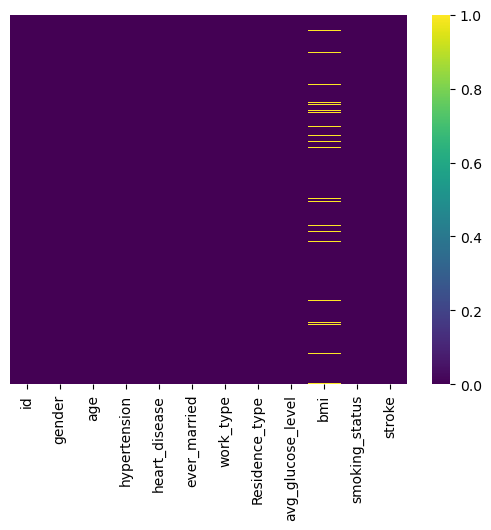

In [11]:
# Simple visualization using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

In [19]:
# Get info about the dataset including non-null counts
print(df.info())

# Count non-missing values per column
print(df.notnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5

In [27]:
# Assuming your DataFrame is called 'df'
# List of object columns
object_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Loop through each object column and print unique values
for col in object_cols:
    unique_values = df[col].unique()
    print(f"\nUnique values in '{col}':")
    print(unique_values)
    print(f"Number of unique values: {len(unique_values)}")


Unique values in 'gender':
['Male' 'Female' 'Other']
Number of unique values: 3

Unique values in 'ever_married':
['Yes' 'No']
Number of unique values: 2

Unique values in 'work_type':
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Number of unique values: 5

Unique values in 'Residence_type':
['Urban' 'Rural']
Number of unique values: 2

Unique values in 'smoking_status':
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Number of unique values: 4


In [35]:
# Label Encoding for binary columns
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
df['Residence_type'] = df['Residence_type'].map({'Rural': 0, 'Urban': 1})

# One-Hot Encoding for nominal columns
df = pd.get_dummies(df, columns=['gender', 'work_type', 'smoking_status'], prefix=['gender', 'work', 'smoke'], dtype=int)

# Verify the changes
print(df.dtypes)  # Check new column types
print(df.head())  # See the transformed DataFrame

id                         int64
age                      float64
hypertension               int64
heart_disease              int64
ever_married               int64
Residence_type             int64
avg_glucose_level        float64
bmi                      float64
stroke                     int64
gender_Female              int64
gender_Male                int64
gender_Other               int64
work_Govt_job              int64
work_Never_worked          int64
work_Private               int64
work_Self-employed         int64
work_children              int64
smoke_Unknown              int64
smoke_formerly smoked      int64
smoke_never smoked         int64
smoke_smokes               int64
dtype: object
      id   age  hypertension  heart_disease  ever_married  Residence_type  \
0   9046  67.0             0              1             1               1   
1  51676  61.0             0              0             1               0   
2  31112  80.0             0              1             1     

                             id       age  hypertension  heart_disease  \
id                     1.000000  0.003538      0.003550      -0.001296   
age                    0.003538  1.000000      0.276398       0.263796   
hypertension           0.003550  0.276398      1.000000       0.108306   
heart_disease         -0.001296  0.263796      0.108306       1.000000   
ever_married           0.013690  0.679125      0.164243       0.114644   
Residence_type        -0.001403  0.014180     -0.007913       0.003092   
avg_glucose_level      0.001092  0.238171      0.174474       0.161857   
bmi                    0.003084  0.333398      0.167811       0.041357   
stroke                 0.006388  0.245257      0.127904       0.134914   
gender_Female         -0.002144  0.027924     -0.021143      -0.085617   
gender_Male            0.001776 -0.027623      0.021275       0.085717   
gender_Other           0.012984 -0.010659     -0.004597      -0.003343   
work_Govt_job         -0.000016  0.130

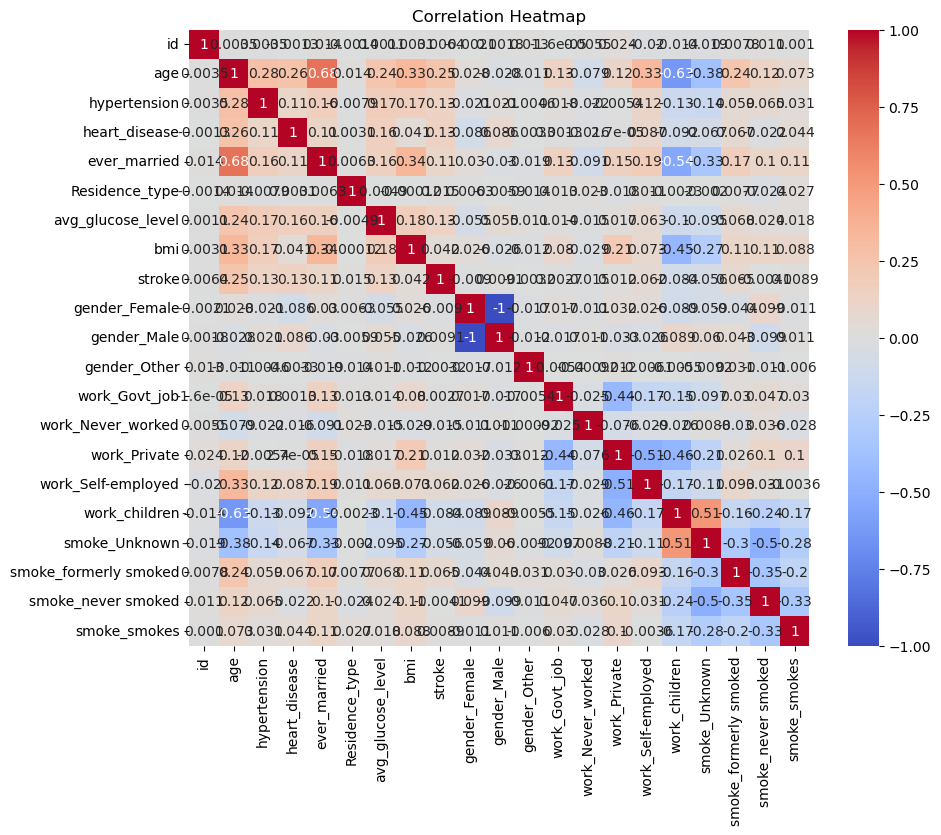

In [37]:
# Select numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

# Display correlation matrix
print(correlation_matrix)

# Visualize with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [39]:
df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,...,gender_Other,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,67.0,0,1,1,1,228.69,36.6,1,0,...,0,0,0,1,0,0,0,1,0,0
1,51676,61.0,0,0,1,0,202.21,NaN,1,1,...,0,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,1,0,105.92,32.5,1,0,...,0,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,1,1,171.23,34.4,1,1,...,0,0,0,1,0,0,0,0,0,1
4,1665,79.0,1,0,1,0,174.12,24.0,1,1,...,0,0,0,0,1,0,0,0,1,0


Age range: 0.08 82.0

Missing values after imputation:
id                       0
age                      0
hypertension             0
heart_disease            0
ever_married             0
Residence_type           0
avg_glucose_level        0
bmi                      0
stroke                   0
gender_Female            0
gender_Male              0
gender_Other             0
work_Govt_job            0
work_Never_worked        0
work_Private             0
work_Self-employed       0
work_children            0
smoke_Unknown            0
smoke_formerly smoked    0
smoke_never smoked       0
smoke_smokes             0
dtype: int64

BMI statistics after imputation:
count    5110.000000
mean       28.915262
std         7.721337
min        10.300000
25%        23.700000
50%        28.300000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64


/tmp/ipykernel_29419/1933230521.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['bmi'] = df['bmi'].fillna(df.groupby(['age_group', 'ever_married'])['bmi'].transform('mean'))


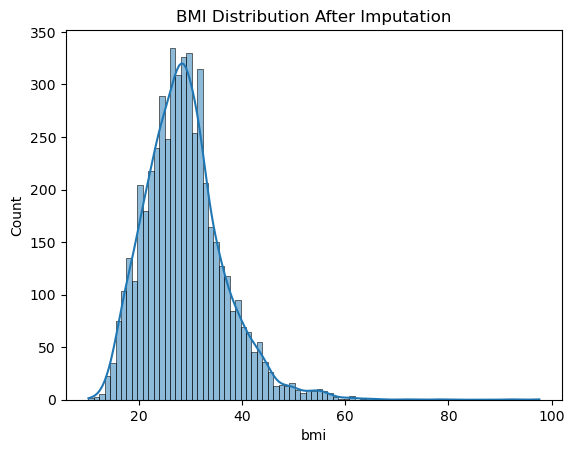

In [41]:
# Check age range to set reasonable bins
print("Age range:", df['age'].min(), df['age'].max())

# Bin 'age' into 5 groups (adjust bins based on your data)
df['age_group'] = pd.cut(df['age'], bins=5, labels=['0-20', '20-40', '40-60', '60-80', '80+'])

# Impute missing BMI using group means of 'age_group' and 'ever_married'
df['bmi'] = df['bmi'].fillna(df.groupby(['age_group', 'ever_married'])['bmi'].transform('mean'))

# If any groups have all NaN (unlikely with 201 missing), fall back to overall mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Drop the temporary age_group column
df = df.drop('age_group', axis=1)

# Verify imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Check BMI distribution
print("\nBMI statistics after imputation:")
print(df['bmi'].describe())

# Optional: Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution After Imputation')
plt.show()

In [43]:
df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,...,gender_Other,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,67.0,0,1,1,1,228.69,36.600000,1,0,...,0,0,0,1,0,0,0,1,0,0
1,51676,61.0,0,0,1,0,202.21,31.702156,1,1,...,0,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,1,0,105.92,32.500000,1,0,...,0,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,1,1,171.23,34.400000,1,1,...,0,0,0,1,0,0,0,0,0,1
4,1665,79.0,1,0,1,0,174.12,24.000000,1,1,...,0,0,0,0,1,0,0,0,1,0


In [45]:
# Create 'still_working' based on work_type columns
df['still_working'] = df[['work_Govt_job', 'work_Private', 'work_Self-employed']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Verify
print(df[['work_Govt_job', 'work_Private', 'work_Self-employed', 'work_children', 'work_Never_worked', 'still_working']].head())
print("\nUnique values in 'still_working':", df['still_working'].unique())

   work_Govt_job  work_Private  work_Self-employed  work_children  \
0              0             1                   0              0   
1              0             0                   1              0   
2              0             1                   0              0   
3              0             1                   0              0   
4              0             0                   1              0   

   work_Never_worked  still_working  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  

Unique values in 'still_working': [1 0]


In [49]:
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female',
       'gender_Male', 'gender_Other', 'work_Govt_job', 'work_Never_worked',
       'work_Private', 'work_Self-employed', 'work_children', 'smoke_Unknown',
       'smoke_formerly smoked', 'smoke_never smoked', 'smoke_smokes',
       'still_working'],
      dtype='object')

In [61]:
df["still_working"].unique()

array([1, 0])

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
# Features (X) - all columns except 'id' and 'stroke'
X = df.drop(['id', 'stroke'], axis=1)
# Target (y) - 'stroke'
y = df['stroke']

In [92]:
# Split data: 80% train, 20% test, stratified due to imbalanced 'stroke'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the model
model = LogisticRegression(max_iter=1000, random_state=42)

In [94]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [96]:
# Predict on test set
y_pred = model.predict(X_test)

In [98]:
# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022


Confusion Matrix:
[[972   0]
 [ 49   1]]

Feature Importance:
                  Feature  Coefficient
1            hypertension     0.437541
14          work_children     0.226738
2           heart_disease     0.201150
18           smoke_smokes     0.156727
4          Residence_type     0.076138
0                     age     0.074669
12           work_Private     0.074524
16  smoke_formerly smoked     0.043261
8             gender_Male     0.018221
10          work_Govt_job     0.016982
6                     bmi     0.007059
5       avg_glucose_level     0.003766
9            gender_Other    -0.023583
7           gender_Female    -0.048508
15

In [100]:
import pickle

# Save the model to a pickle file
with open('stroke_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'stroke_model.pkl'")

Model saved as 'stroke_model.pkl'


In [102]:
import os

# Print the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)

# Assuming you saved the model as 'stroke_model.pkl'
model_file = 'stroke_model.pkl'
full_path = os.path.join(current_directory, model_file)
print("Model should be saved at:", full_path)

Current working directory: /home/okhub
Model should be saved at: /home/okhub/stroke_model.pkl


In [80]:
!pip install catboost
!pip install xgboost
!pip install lightgbm
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 342.1 kB/s eta 0:00:00 kB/s eta 0:00:01:05


In [82]:
# Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define individual models with tuned parameters
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    class_weights=[1, 10],  # Weight positive class higher
    verbose=0,
    random_state=42
)

xgboost_model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=10,  # Weight positive class
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

lightgbm_model = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    class_weight='balanced',
    random_state=42
)

# Ensemble with soft voting (averages probabilities)
ensemble_model = VotingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('xgboost', xgboost_model),
        ('lightgbm', lightgbm_model)
    ],
    voting='soft'  # Soft voting for probability averaging
)

# Train the ensemble on SMOTE-balanced data
ensemble_model.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred = ensemble_model.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Predict probabilities for further tuning
y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]

/home/okhub/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:23:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3889, number of negative: 3889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 795
[LightGBM] [Info] Number of data points in the train set: 7778, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [90]:
from sklearn.ensemble import StackingClassifier
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.03, depth=6, class_weights=[1, 20], verbose=0, random_state=42)
xgboost_model = XGBClassifier(n_estimators=1000, learning_rate=0.03, max_depth=6, scale_pos_weight=20, eval_metric='logloss', random_state=42)
lightgbm_model = LGBMClassifier(n_estimators=1000, learning_rate=0.03, max_depth=6, scale_pos_weight=20, random_state=42)

# Stacking with Logistic Regression as meta-model
stacking_model = StackingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('xgboost', xgboost_model),
        ('lightgbm', lightgbm_model)
    ],
    final_estimator=LogisticRegression(class_weight='balanced'),
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train_smote, y_train_smote)

# Predict probabilities
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

# Optimize threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
optimal_idx = np.argmax(tpr - fpr)  # Maximize sensitivity - specificity
optimal_threshold = thresholds[optimal_idx]
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate
print(f"Optimal Threshold: {optimal_threshold:.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance (approximate from XGBoost as example)
xgboost_model.fit(X_train_smote, y_train_smote)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgboost_model.feature_importances_})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3889, number of negative: 3889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 795
[LightGBM] [Info] Number of data points in the train set: 7778, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po